In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving wine.csv to wine.csv


In [3]:
df = pd.read_csv('wine.csv')
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [18]:
# Using the standard scaler method.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [19]:
print(df_scaled.shape)
df_scaled

(178, 14)


array([[-1.21394365,  1.51861254, -0.5622498 , ...,  0.36217728,
         1.84791957,  1.01300893],
       [-1.21394365,  0.24628963, -0.49941338, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [-1.21394365,  0.19687903,  0.02123125, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 1.37386437,  0.20923168,  0.22769377, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.37386437,  1.39508604,  1.58316512, ..., -1.52437837,
        -1.42894777, -0.59516041]])

# Building PCA

In [20]:
# Using PCA to reduce the dimensionality of the data in order to optimize the result of the clustering.
pca = PCA(n_components = 14)
pca_values = pca.fit_transform(df_scaled)
pca_values

array([[-3.52293390e+00, -1.45309844e+00, -1.64795488e-01, ...,
         5.52927766e-01, -3.02978176e-01,  2.00857450e-01],
       [-2.52885806e+00,  3.30019252e-01, -2.02670665e+00, ...,
         3.94971160e-01, -1.46645308e-01,  1.26402355e-01],
       [-2.78502898e+00, -1.03693595e+00,  9.83237703e-01, ...,
         1.89799314e-03,  2.12780166e-02, -5.57515155e-02],
       ...,
       [ 3.02727243e+00, -2.75604024e+00, -9.40803036e-01, ...,
         6.93336340e-01,  1.67035660e-01, -3.16957430e-02],
       [ 2.75522166e+00, -2.29378408e+00, -5.50473677e-01, ...,
         3.44119826e-01, -1.09514873e-01,  1.02823104e-01],
       [ 3.49633565e+00, -2.76060799e+00,  1.01315115e+00, ...,
        -1.89866131e-01, -1.64090011e-01, -2.64916504e-01]])

In [21]:
# The amount of variance that each PCA explains is
var = pca.explained_variance_
print(var)
var_ratio = pca.explained_variance_ratio_
print(var_ratio)
# Cumulative variance
var1 = np.cumsum(np.round(var_ratio,decimals = 4)*100)
print(var1)

[5.56722458 2.51118402 1.45424413 0.9331603  0.88246016 0.67657935
 0.55692777 0.35201176 0.29620602 0.26378805 0.2271244  0.16975037
 0.13029618 0.05813894]
[0.39542486 0.17836259 0.10329102 0.06627984 0.06267875 0.0480556
 0.03955707 0.02500244 0.02103871 0.01873615 0.01613203 0.01205691
 0.00925458 0.00412945]
[ 39.54  57.38  67.71  74.34  80.61  85.42  89.38  91.88  93.98  95.85
  97.46  98.67  99.6  100.01]


Text(0, 0.5, 'The explained varaince')

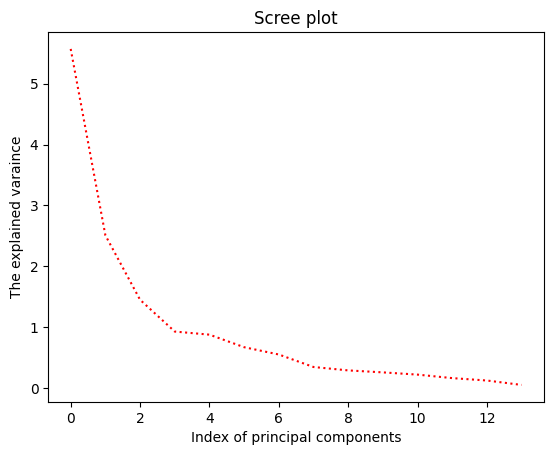

In [22]:
figure = plt.figure()
plt.plot(pca.explained_variance_, color='red', linestyle='dotted')
plt.title("Scree plot")
plt.xlabel("Index of principal components")
plt.ylabel("The explained varaince")

In [23]:
pca.components_

array([[ 0.39366953, -0.13632501,  0.22267638, -0.00225793,  0.22429849,
        -0.12463016, -0.35926404, -0.39071171,  0.2670012 , -0.2790625 ,
         0.08931829, -0.27682265, -0.35052618, -0.26951525],
       [-0.00569041, -0.48416087, -0.22359095, -0.31585588,  0.01161574,
        -0.30055143, -0.06711983,  0.00131345, -0.0269887 , -0.04122256,
        -0.52978274,  0.27790735,  0.16277625, -0.36605886],
       [ 0.00121795, -0.20740081,  0.08879606,  0.62610236,  0.6119896 ,
         0.13098458,  0.14650775,  0.15096275,  0.16997551,  0.14987959,
        -0.1372663 ,  0.08532854,  0.16620436, -0.12668685],
       [ 0.12246373, -0.08191848,  0.46988824, -0.24984122,  0.07199322,
        -0.16321412,  0.19098521,  0.14461667, -0.32801272,  0.46275771,
         0.07211248, -0.43466618,  0.15672341, -0.2557949 ],
       [ 0.15758395, -0.25089415, -0.18860015, -0.0935236 ,  0.0465675 ,
         0.77833048, -0.14466563, -0.11200553, -0.43257916,  0.0915882 ,
        -0.0462696 , -0.02

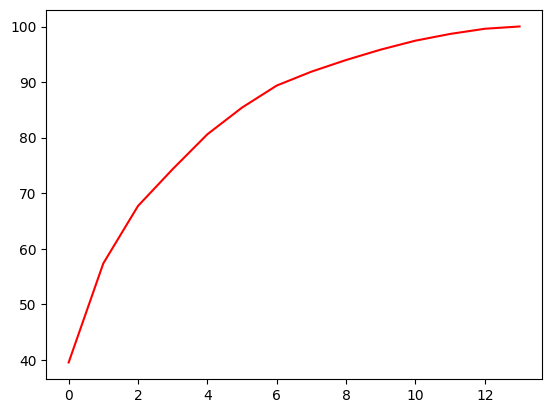

In [24]:
# Variance plot for pca components :
plt.plot(var1,color="red")

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


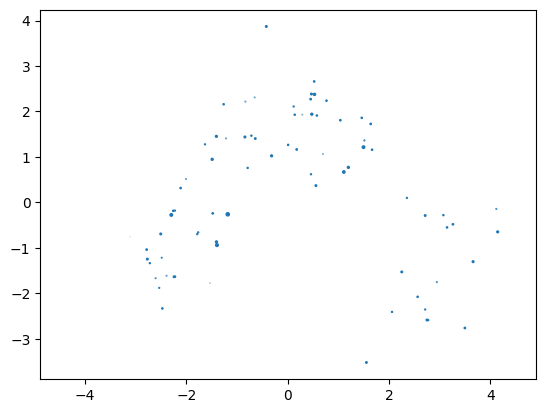

In [25]:
# plot between pca1,pca2 and pca3 :
x = pca_values[:,0:1]
y = pca_values[:,1:2]
z = pca_values[:,2:3]
plt.scatter(x,y,z)

In [41]:
df_final = pd.DataFrame(pca_values[:,0:3],columns=["PC1","PC2","PC3"])
df_final

,PC1,PC2,PC3
0,-3.522934,-1.453098,-0.164795
1,-2.528858,0.330019,-2.026707
2,-2.785029,-1.036936,0.983238
3,-3.922588,-2.768210,-0.174968
4,-1.407511,-0.867773,2.025829
...,...,...,...
173,3.627996,-2.206617,-0.343668
174,2.942729,-1.752263,0.207480
175,3.027272,-2.756040,-0.940803
176,2.755222,-2.293784,-0.550474


# Hierarchial Clustering

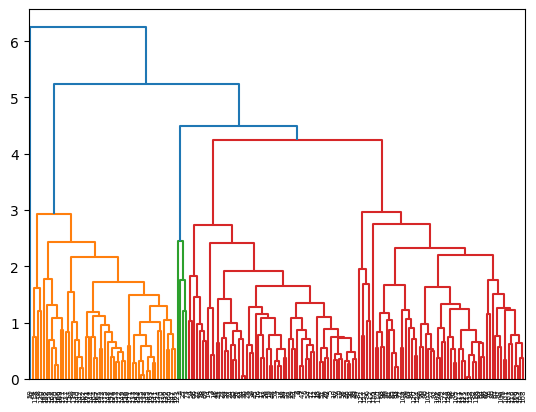

In [42]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
dendrogram = sch.dendrogram(sch.linkage(df_final,method="average"))

In [34]:
# Creating Clusters :
hc = AgglomerativeClustering(n_clusters=3,affinity="euclidean",linkage="average")

In [43]:
y_hc = hc.fit_predict(df_final)
clusters = pd.DataFrame(y_hc)
df_final["h_clusterid"] = clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [44]:
df_final.sort_values('h_clusterid')

,PC1,PC2,PC3,h_clusterid
0,-3.522934,-1.453098,-0.164795,0
96,0.555473,0.370127,1.309239,0
95,-2.260607,-0.184286,0.791708,0
94,-0.836145,2.217549,0.143653,0
93,-0.653304,2.308393,0.115558,0
...,...,...,...,...
146,4.459950,-0.635479,-1.459910,2
147,3.829250,-1.262330,-0.111850,2
148,3.133650,-1.564646,-0.472736,2
150,2.712565,-2.353880,0.438394,2


In [45]:
df_final['Class'] = df['Type']
df_final

,PC1,PC2,PC3,h_clusterid,Class
0,-3.522934,-1.453098,-0.164795,0,1
1,-2.528858,0.330019,-2.026707,0,1
2,-2.785029,-1.036936,0.983238,0,1
3,-3.922588,-2.768210,-0.174968,0,1
4,-1.407511,-0.867773,2.025829,0,1
...,...,...,...,...,...
173,3.627996,-2.206617,-0.343668,2,3
174,2.942729,-1.752263,0.207480,2,3
175,3.027272,-2.756040,-0.940803,2,3
176,2.755222,-2.293784,-0.550474,2,3


In [46]:
df_final.groupby(df_final.h_clusterid).mean()

,PC1,PC2,PC3,Class
h_clusterid,,,,
0,-1.243723,0.430350,0.140042,1.528000
1,0.874925,3.077724,-4.585646,2.000000
2,2.972893,-1.093682,-0.248455,2.923077


# K-Means Clustering

In [47]:
from sklearn.cluster import KMeans

In [49]:
df_k = df_final.iloc[:,0:3]
df_k.head()

,PC1,PC2,PC3
0,-3.522934,-1.453098,-0.164795
1,-2.528858,0.330019,-2.026707
2,-2.785029,-1.036936,0.983238
3,-3.922588,-2.768210,-0.174968
4,-1.407511,-0.867773,2.025829


Text(0, 0.5, 'WCSS')

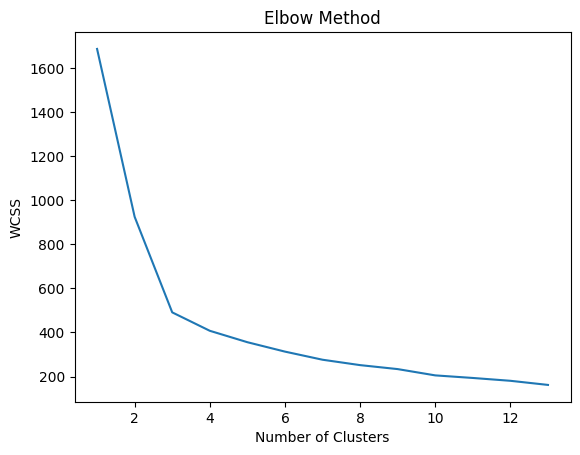

In [54]:
wcss=[]
for i in range(1,14):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_k)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,14),wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")

In [55]:
# Building Cluster Algorithm
cluster_new = KMeans(n_clusters = 3)
cluster_new.fit(df_k)
cluster_new.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [58]:
df_k['cluster_new'] = cluster_new.labels_
df_k.head()

,PC1,PC2,PC3,clusterid_new,cluster_new
0,-3.522934,-1.453098,-0.164795,0,0
1,-2.528858,0.330019,-2.026707,0,0
2,-2.785029,-1.036936,0.983238,0,0
3,-3.922588,-2.768210,-0.174968,0,0
4,-1.407511,-0.867773,2.025829,0,0


In [65]:
df_k.groupby("cluster_new").agg(["mean"]).reset_index()

,cluster_new,PC1,PC2,PC3,Class
,,mean,mean,mean,mean
0,0,-2.548859,-0.936610,0.001632,1.048387
1,1,3.058665,-1.208263,-0.177541,2.979592
2,2,0.121711,1.750369,0.128334,2.000000


In [67]:
df['h_cluster'] = clusters
df['k_cluster'] = cluster_new.labels_
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,h_cluster,k_cluster
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0,0
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0,0
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0,0
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0,0
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2,1
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2,1
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2,1
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2,1
